# Answer to Notebook 1:

# Example 2.1

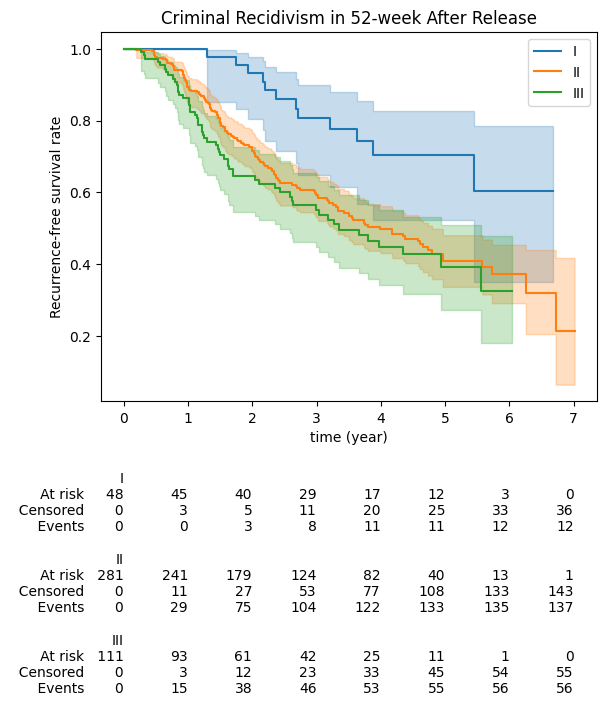

In [1]:
import matplotlib.pyplot as plt 
from lifelines.datasets import load_gbsg2
import numpy as np 
from lifelines import KaplanMeierFitter

data = (
    load_gbsg2()
    .assign(time = lambda x: x['time']/365.5 )
    .query("horTh == 'no' ")
)
I = data.query("tgrade == 'I' ") 
II = data.query("tgrade == 'II' ")
III = data.query("tgrade == 'III' ")

dfs = [I, II, III]
labels = ['I', 'II', 'III']

ax = plt.subplot(111)
# t = np.linspace(0, 2660, 2÷÷)
kmfs = [KaplanMeierFitter() for i in dfs]
for i, df in enumerate(dfs):
    kmfs[i].fit(df['time'], df['cens'], label=labels[i])

# plotting the KM curves
for i, _ in enumerate(dfs):
    kmfs[i].plot()

from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(*kmfs, ax=ax)

ax.set_title("Criminal Recidivism in 52-week After Release");
ax.set_ylabel("Recurrence-free survival rate");
ax.set_xlabel("time (year)");